In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from nltk.probability import FreqDist

np.random.seed(42)

In [38]:
df = pd.read_csv('preprocessed_tweets.csv')
df.head(3)

C:\Users\Jehoiada Wong\AppData\Local\Temp\ipykernel_19548\3309970113.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('preprocessed_tweets.csv')


,date,text,is_retweet,tokenized_text,text2,hashtags,text_without_stopwords,hashtag_count,tweet_length,contains_price,labels
0,2021-02-10,blue ridge bank shares halted by nyse after #b...,False,"['blue', 'ridge', 'bank', 'shares', 'halted', ...",blue ridge bank shares halted by nyse after bi...,['#bitcoin'],"['blue', 'ridge', 'bank', 'shares', 'halted', ...",1,13,False,0
1,2021-02-10,"ð today, that's this #thursday, we will do ...",False,"['today', 'that', 'this', 'thursday', 'we', 'w...",today that this thursday we will do take with ...,"['#thursday', '#btc', '#wallet', '#security']","['today', 'thursday', 'take', 'friend', 'bitco...",4,16,False,0
2,2021-02-10,"guys evening, i have read this article about b...",False,"['guys', 'evening', 'have', 'read', 'this', 'a...",guys evening have read this article about bitc...,[],"['guys', 'evening', 'read', 'article', 'bitcoi...",0,18,False,0


In [39]:
df['text_without_stopwords'][0]

"['blue', 'ridge', 'bank', 'shares', 'halted', 'nyse', 'bitcoin', 'atm', 'announcement', 'iv', 'si']"

In [40]:
df['date'].max(), df['date'].min()

('2021-08-21', '2021-02-05')

In [41]:
bitcoin_data = yf.download("BTC-USD",
                           start=df['date'].min(),
                           end=df['date'].max(),
                           interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [42]:
bitcoin_data['Date'] = bitcoin_data.index

In [43]:
bitcoin_data.head(3)

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402,2021-02-05
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,2021-02-06
2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,2021-02-07


## Exploratory Data Analysis

Checking the distribution of sentiment on the dataset

C:\Users\Jehoiada Wong\AppData\Local\Temp\ipykernel_19548\2029309637.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  dist.set_xticklabels(['Negative', 'Positive'])


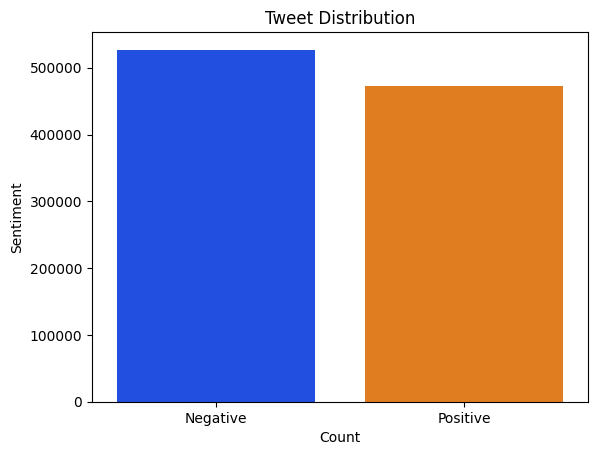

In [44]:
dist = sns.countplot(data=df,
                     x='labels',
                     palette='bright',
                     hue='labels',
                     legend=False)
dist.set(xlabel='Count', ylabel='Sentiment', title='Tweet Distribution')
dist.set_xticklabels(['Negative', 'Positive'])
plt.show()
## Dataset look fairly balanced

Text(0.5, 1.0, 'Tweet Sentiment Over Time')

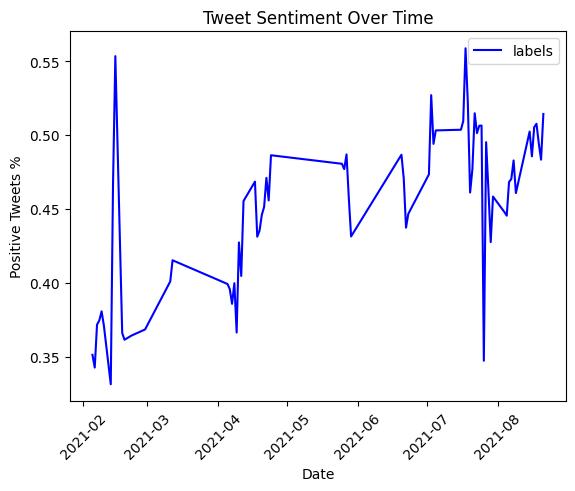

In [45]:
#positive sentiments per day
pos_sen = df[['date', 'labels']].groupby('date').mean().reset_index()
pos_sen['date'] = pd.to_datetime(pos_sen['date']).dt.date
pos_sen.plot(x='date', c='blue')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Positive Tweets %')
plt.title('Tweet Sentiment Over Time')

We will look at the Bitcoin price to see the corelation of bitcoin price with bitcoin twitter volume 

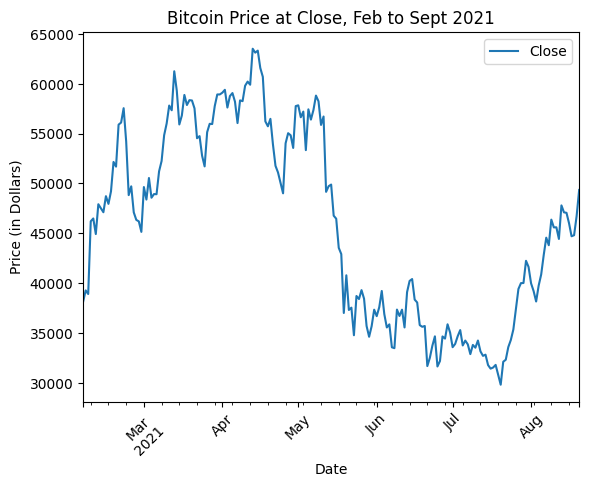

In [46]:
import matplotlib.dates as mdates
fromatter = mdates.DateFormatter('%m')

bitcoin_data.plot(x='Date', y='Close')
plt.xticks(rotation=45)
plt.ylabel('Price (in Dollars)')
plt.title('Bitcoin Price at Close, Feb to Sept 2021')
dist.xaxis.set_major_formatter(fromatter)
plt.show()

Price to Sentiment Chart

Text(0.5, 1.0, 'Tweet Sentiment vs Bitcoin Price')

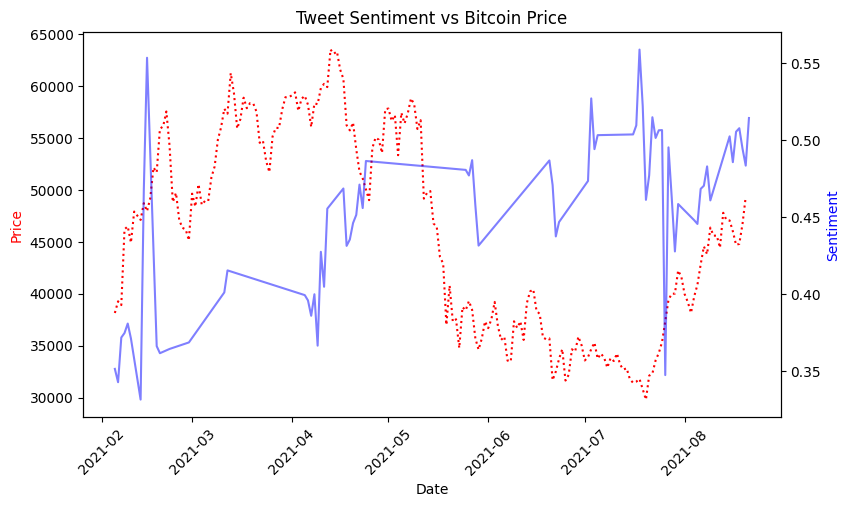

In [47]:

fig,ax = plt.subplots(figsize=(9,5))

ax.plot(bitcoin_data.Date, bitcoin_data.Close, color="red", linestyle='dotted')
ax.set_xlabel("Date", fontsize = 10)
ax.set_ylabel("Price",color="red", fontsize=10)
plt.xticks(rotation=45)

ax2=ax.twinx()
ax2.plot(pos_sen.date, pos_sen.labels, color="blue", alpha=0.5)
ax2.set_ylabel("Sentiment",color="blue",fontsize=10)

plt.title('Tweet Sentiment vs Bitcoin Price')

Text(0.5, 1.0, 'Number of Tweets')

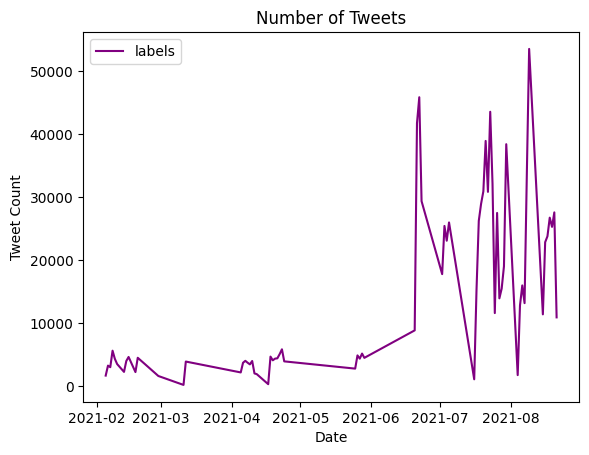

In [48]:
#num of tweets per day

num_of_tweets = df[['date', 'labels']].groupby('date').count().reset_index()
num_of_tweets['date'] = pd.to_datetime(num_of_tweets['date']).dt.date
num_of_tweets.plot(x='date', c='purple')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Number of Tweets')

Bitcoin price to Tweet Volume Chart

Text(0.5, 1.0, 'Tweet Sentiment vs Bitcoin Price')

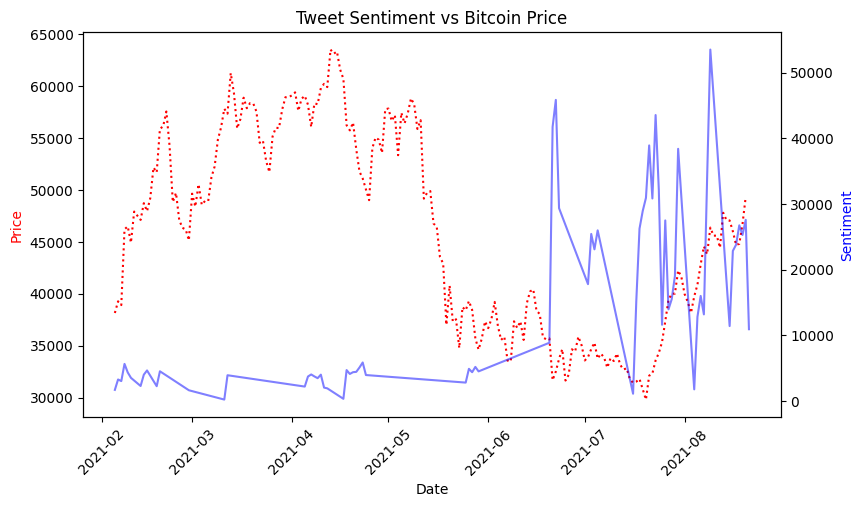

In [49]:

fig,ax = plt.subplots(figsize=(9,5))

ax.plot(bitcoin_data.Date, bitcoin_data.Close, color="red", linestyle='dotted')
ax.set_xlabel("Date", fontsize = 10)
ax.set_ylabel("Price",color="red", fontsize=10)
plt.xticks(rotation=45)

ax2=ax.twinx()
ax2.plot(num_of_tweets.date, num_of_tweets.labels, color="blue", alpha=0.5)
ax2.set_ylabel("Sentiment",color="blue",fontsize=10)

plt.title('Tweet Sentiment vs Bitcoin Price')

Bitcoin price to Tweet Volume Chart

Text(0.5, 1.0, 'Tweet Sentiment vs Bitcoin Price')

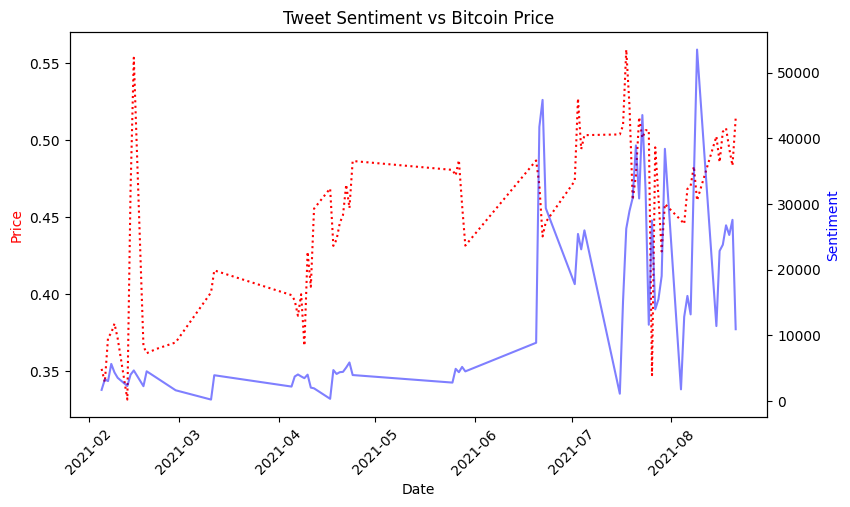

In [50]:

fig,ax = plt.subplots(figsize=(9,5))

ax.plot(pos_sen.date, pos_sen.labels, color="red", linestyle='dotted')
ax.set_xlabel("Date", fontsize = 10)
ax.set_ylabel("Price",color="red", fontsize=10)
plt.xticks(rotation=45)

ax2=ax.twinx()
ax2.plot(num_of_tweets.date, num_of_tweets.labels, color="blue", alpha=0.5)
ax2.set_ylabel("Sentiment",color="blue",fontsize=10)

plt.title('Tweet Sentiment vs Bitcoin Price')

From the charts above we can conclude that Bitcoin prices has strong correlation with the sentiment

We now see the commonly used words across all tweets and seperate them into positive and negative

In [51]:
def convert_to_list(string):
    return eval(string)

df['text_without_stopwords'] = df['text_without_stopwords'].apply(convert_to_list)

In [52]:
# distribution of most frequent words
freq_dist = FreqDist(df["text_without_stopwords"].explode())
freq_dist_df = pd.DataFrame(pd.Series(freq_dist), columns=['count'])
freq_dist_df.head()

,count
blue,2643
ridge,67
bank,6923
shares,3063
halted,39


In [53]:
display(freq_dist_df.sort_values(by='count', ascending=False))

print("Total number of unique words: ", len(freq_dist_df))
print("Words appearing more than once: ", len(freq_dist_df[freq_dist_df['count']>1]))
print("Words appearing five or more times: ", len(freq_dist_df[freq_dist_df['count']>=5]))
print("Words appearing 10 or more times: ", len(freq_dist_df[freq_dist_df['count']>=10]))
print("Words appearing 50 or more times: ", len(freq_dist_df[freq_dist_df['count']>=50]))
print("Words appearing 5000 or more times: ", len(freq_dist_df[freq_dist_df['count']>=5000]))

,count
bitcoin,1421651
crypto,449316
eth,249670
project,145770
doge,122002
...,...
leprechauns,1
banshees,1
uspresidentjoebiden,1
section230,1


Total number of unique words:  215464
Words appearing more than once:  101721
Words appearing five or more times:  53081
Words appearing 10 or more times:  35318
Words appearing 50 or more times:  14612
Words appearing 5000 or more times:  450


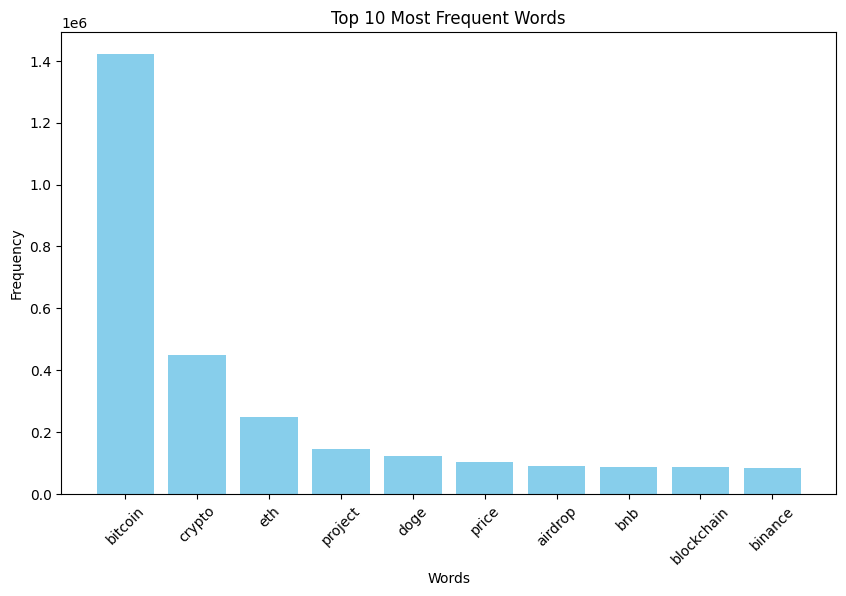

In [54]:
top_10 = freq_dist_df.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10.index, top_10['count'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

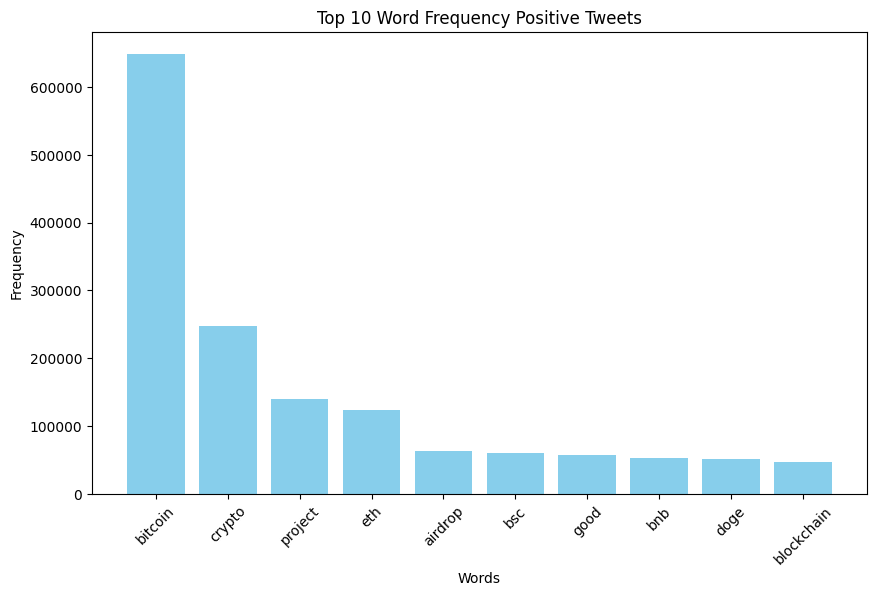

In [55]:
sample_freq_dist = FreqDist(df["text_without_stopwords"][df['labels']==1].explode())
sample_freq_dist= pd.DataFrame(pd.Series(sample_freq_dist), columns=['count'])

top_10 = sample_freq_dist.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10.index, top_10['count'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequency Positive Tweets')
plt.xticks(rotation=45)
plt.show()

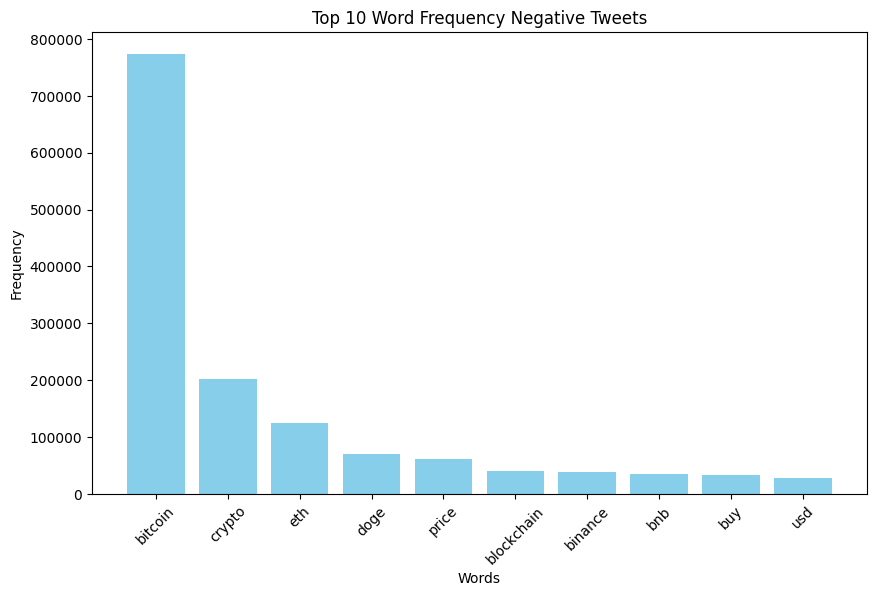

In [56]:
sample_freq_dist = FreqDist(df["text_without_stopwords"][df['labels']==0].explode())
sample_freq_dist= pd.DataFrame(pd.Series(sample_freq_dist), columns=['count'])

top_10 = sample_freq_dist.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10.index, top_10['count'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequency Negative Tweets')
plt.xticks(rotation=45)
plt.show()

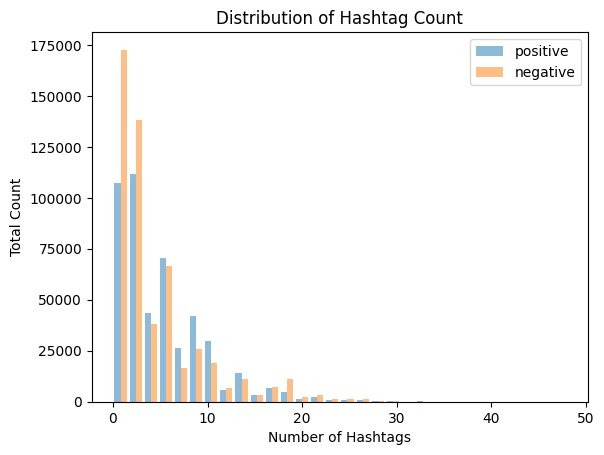

In [57]:
plt.hist([df['hashtag_count'][df['labels']==1], 
          df['hashtag_count'][df['labels']==0]], 
         bins=30, alpha=0.5, label=['positive', 'negative'])
plt.legend(loc='upper right')
plt.xlabel('Number of Hashtags')
plt.ylabel('Total Count')
plt.title('Distribution of Hashtag Count')
plt.show()

C:\Users\Jehoiada Wong\AppData\Local\Temp\ipykernel_19548\3351153205.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=df['labels'][df['contains_price']==1],
C:\Users\Jehoiada Wong\AppData\Local\Temp\ipykernel_19548\3351153205.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['Negative', 'Positive'])


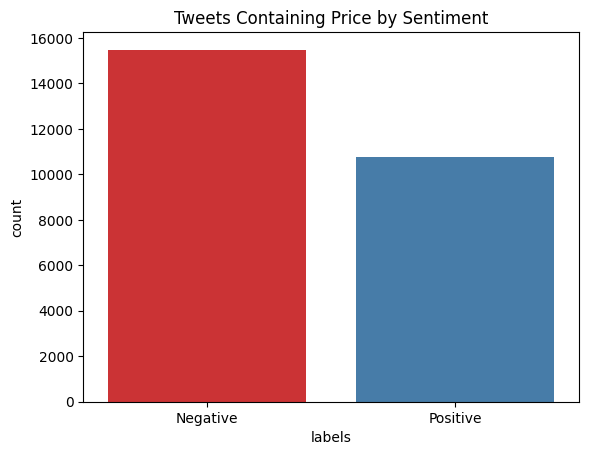

In [58]:
g = sns.countplot(x=df['labels'][df['contains_price']==1], 
                  label=['Positive', 'Negative'], palette='Set1')
g.set_title("Tweets Containing Price by Sentiment")
g.set_xticklabels(['Negative', 'Positive'])
plt.show()